In [3]:
%load_ext autoreload
%autoreload 2

import sys
if sys.path[-1] != "..": sys.path.append("../")

from qBN.qBNMC import qBNMC
from qBN.qBNRejection import qBNRejection
from XPs.qBNRT import qRuntime

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

import random
import numpy as np

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='1b6910ff55c1d3853e5c8e2ca2b0dbbc3b415fb897d26a6c272c63254527581c824aea1180585f706ab8263318f3c553549d136ca32952ef401abb54011eee33'
)

backend = service.get_backend("ibm_brisbane")

/tmp/ipykernel_21851/1320750717.py:9: DeprecationWarning: The get_backend() method is deprecated as of qiskit-ibm-runtime 0.24 and will be removed no sooner than 3 months after the release date. Please use backend() instead.
  backend = service.get_backend("ibm_brisbane")


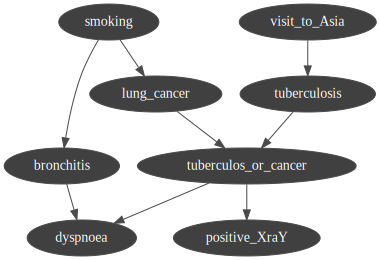

visit_to_Asia:Labelized({0|1}) 0
tuberculosis:Labelized({0|1}) 1
tuberculos_or_cancer:Labelized({0|1}) 2
positive_XraY:Labelized({0|1}) 3
lung_cancer:Labelized({0|1}) 4
smoking:Labelized({0|1}) 5
bronchitis:Labelized({0|1}) 6
dyspnoea:Labelized({0|1}) 7


In [5]:
asia_bn = gum.loadBN("../tutorials/bayes_nets/asia.bif")
gnb.showBN(asia_bn, size=20)
for n_id in asia_bn.nodes():
    print(asia_bn.variable(n_id), n_id)

In [17]:
qbn = qBNMC(asia_bn)
qbn.getAllParentSates('tuberculos_or_cancer')

[{'tuberculosis': 0, 'lung_cancer': 0},
 {'tuberculosis': 1, 'lung_cancer': 0},
 {'tuberculosis': 0, 'lung_cancer': 1},
 {'tuberculosis': 1, 'lung_cancer': 1}]

In [21]:
qr = qBNRejection(qbn)
qr.maxIter()

1000